# MLP Regression
## Module import

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Fit default model on different sample windows

In [2]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/8-splits/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Loop through the files in the directory
# for offset in os.listdir(input_dir):
for offset in ['1','10','20','30','40','50']:  # Subset (faster)
    print(offset)
    
    train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
    test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))
    
    # Split the data into features and target
    X_train = train_data.iloc[:, 1:-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, 1:-1]
    y_test = test_data.iloc[:, -1]
    
    # Fit the MLPRegressor model
    model = MLPRegressor(
        hidden_layer_sizes=(100),
        activation="tanh",  # Changed from 'Relu'
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=200,
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000
    )
    
    model.fit(X_train, y_train)

    # Predict the test set
    y_test_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_test_pred)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_test_pred)

    # Add the results to the DataFrames
    mse_results = pd.concat([mse_results, pd.DataFrame({'Offset': [offset], 'MSE': [mse]})])
    r2_results = pd.concat([r2_results, pd.DataFrame({'Offset': [offset], 'R2': [r2]})])


1
10
20
30
40
50


## Plot mse error and r2 score

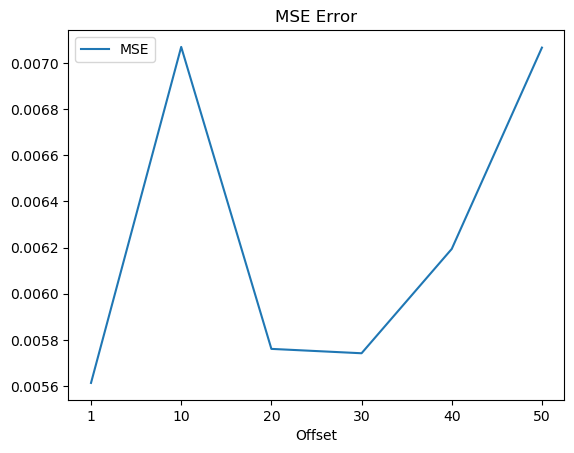

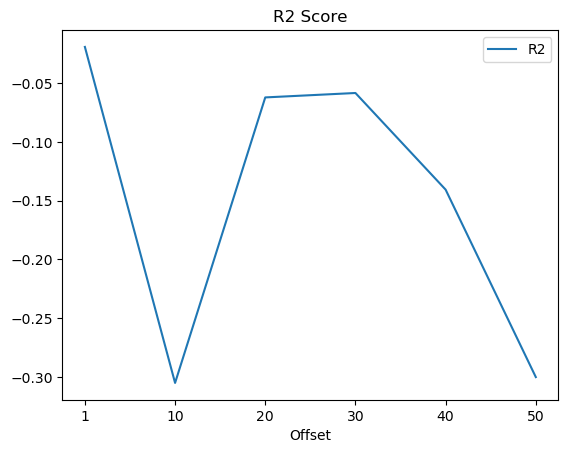

In [3]:
sorted_mse = mse_results.sort_values(by='Offset')
sorted_mse.plot(title='MSE Error', x='Offset')

sorted_r2 = r2_results.sort_values(by='Offset')
sorted_r2.plot(title='R2 Score', x='Offset', y='R2')

## Save results to a CSV file

In [11]:
sorted_mse.to_csv('mse_error_results.csv', index=False)
sorted_r2.to_csv('r2_results.csv', index=False)